In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import finesse
import finesse.ligo
from finesse.cymath.homs import HGModes

import func_funs as ff
import graph_funs as grf
import finesse3_funs as f3f
import wolfram_funs as wlf

import networkx as nx
# import pygraphviz as pgv
import pydot

from IPython.display import Image, SVG

In [11]:
kat = finesse.ligo.make_aligo()

In [12]:
G0 = kat.optical_network
G = grf.remove_orphans(kat.optical_network)
RG = f3f.get_reduced_multigraph(kat)
RG2 = grf.remove_sinks(RG)

In [13]:
layr = nx.random_layout(G)
lay5 = nx.spectral_layout(G)

In [14]:
lay1 = nx.kamada_kawai_layout(G, pos=layr)

In [229]:
scipy.constants.golden

1.618033988749895

In [309]:
def graphviz_draw(G, draw_labels=True):
    """Draws a |graphviz| figure using |neato| layout.
    The default settings are tested to produce a passable drawing of the 
    aLIGO DRMI graph.
    
    Example
    kat = finesse.ligo.make_aligo()
    graphviz_draw(kat.optical_network)
    """
    
    A = nx.drawing.nx_agraph.to_agraph(G)
    
    # remove unnecessary metadata from DOT file
    for node in A.nodes():
        for k in node.attr.keys():
            node.attr[k] = ''
    for edge in A.edges():
        for k in edge.attr.keys():
            edge.attr[k] = ''
            
    A.graph_attr['mode'] = 'sgd'
    A.graph_attr['maxiter'] = 300
    A.graph_attr['size'] = '11,7!'
    A.graph_attr['pad'] = '10,0.1'
            
    if draw_labels:
        A.node_attr['shape'] = 'oval'
        A.graph_attr['overlap'] = 'scale'
        A.graph_attr['sep'] = "-0.7"
    else:
        A.node_attr['shape'] = 'circle'
        A.node_attr['style'] = 'filled'
        A.node_attr['label'] = ' '
    
    return SVG(A.draw(format='svg', prog='neato'))

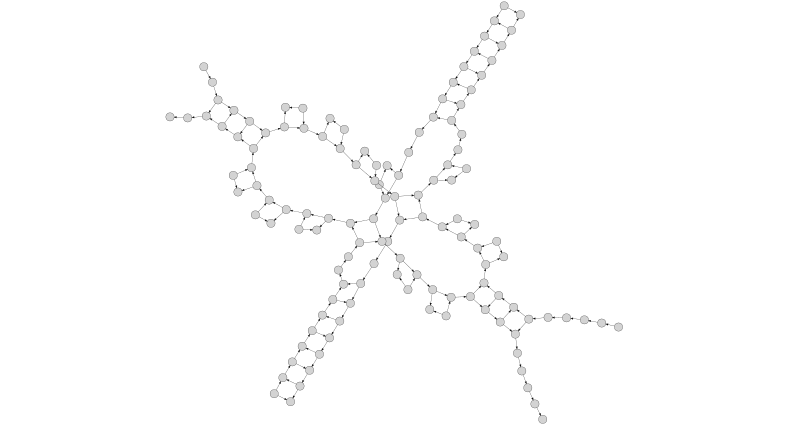

In [310]:
graphviz_draw(G, draw_labels=False)

In [303]:
A = nx.drawing.nx_agraph.to_agraph(G)
# A.node_attr['shape'] = 'oval'
A.graph_attr['mode'] = 'sgd'
# A.graph_attr['pad'] = 10
# A.graph_attr['sep'] = 0
# A.graph_attr['overlap'] = 'prism5'
A.graph_attr['maxiter'] = 300
A.graph_attr['dpi'] = 50
# A.graph_attr['size'] = 9
# A.graph_attr['page'] = np.array([12,5])
# A.graph_attr['splines'] = True
# A.graph_attr['normalize'] = 80 # degrees
# A.graph_attr['ratio'] = 0.5
# 
# A.node_attr['style'] = 'filled'
# A.node_attr['fixedsize'] = 'shape'
# A.node_attr['label'] = ' '
# A.node_attr['width'] = 1
# A.node_attr['hieght'] = 100
# A.node_attr['sep'] = 5

# for node in A.nodes():
#     for k in node.attr.keys():
#         node.attr[k] = ''
        
# for edge in A.edges():
#     for k in edge.attr.keys():
#         edge.attr[k] = ''

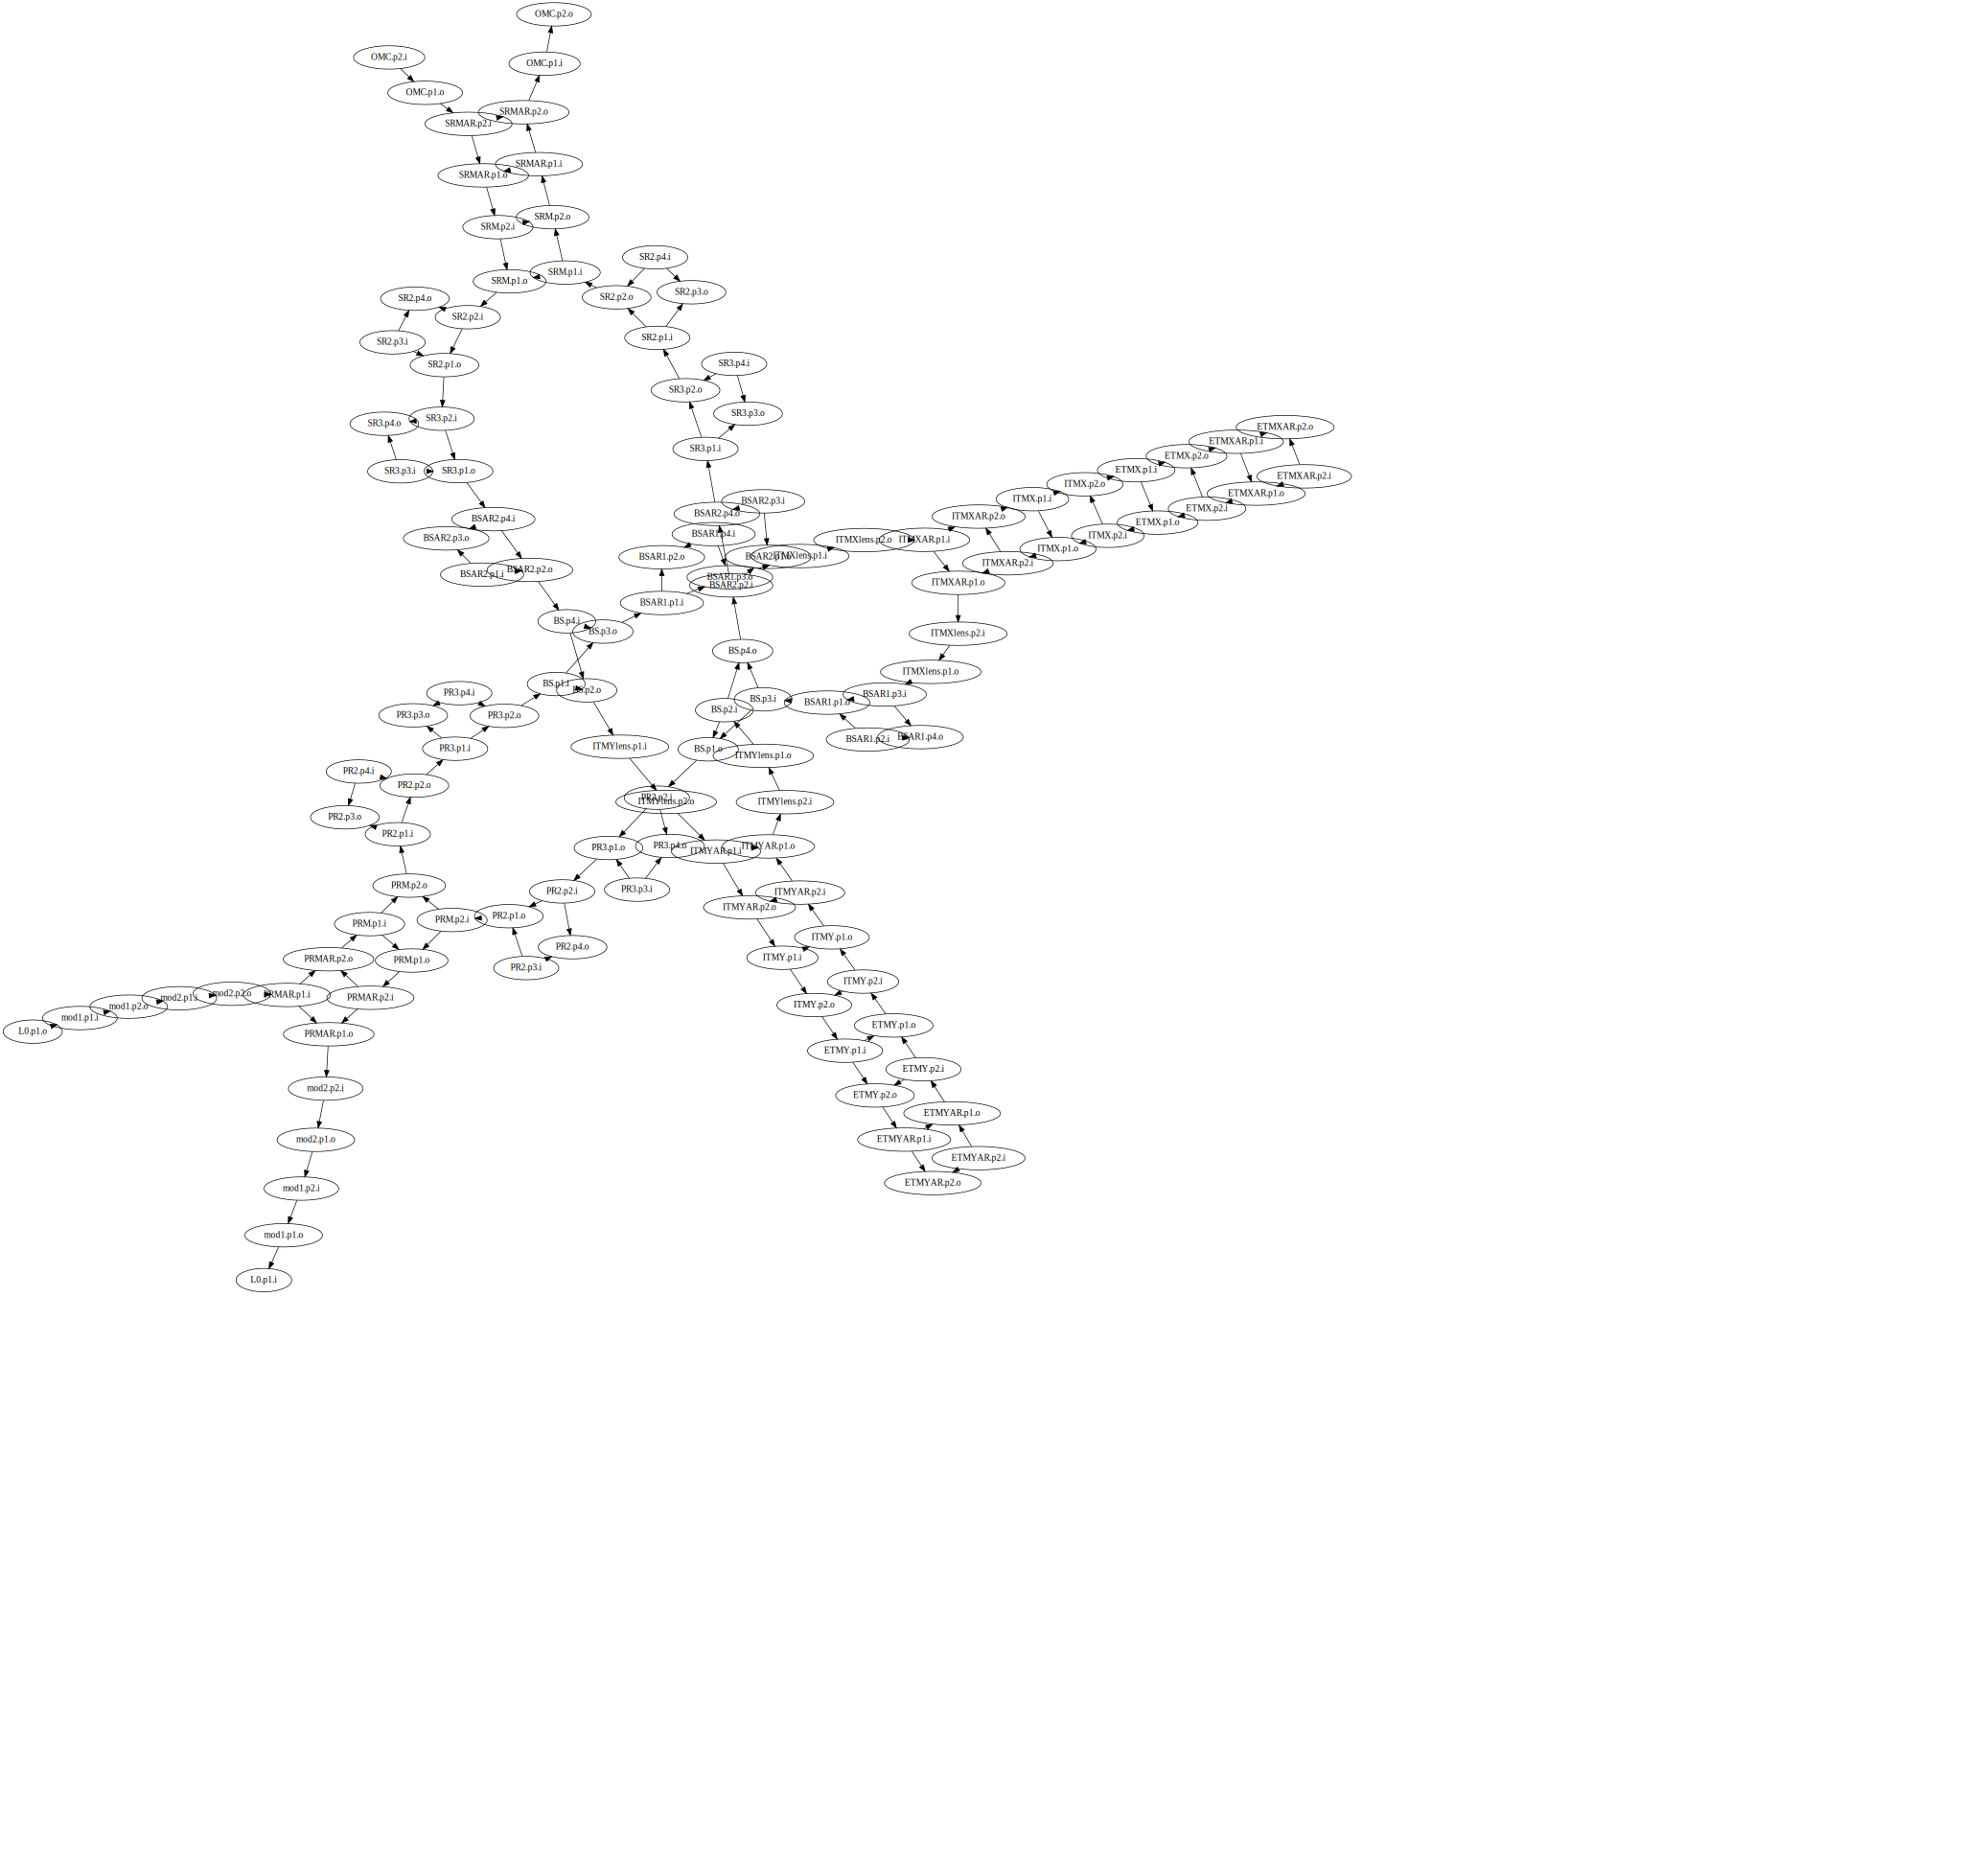

In [174]:
SVG(A.draw(format='svg', prog='neato'))

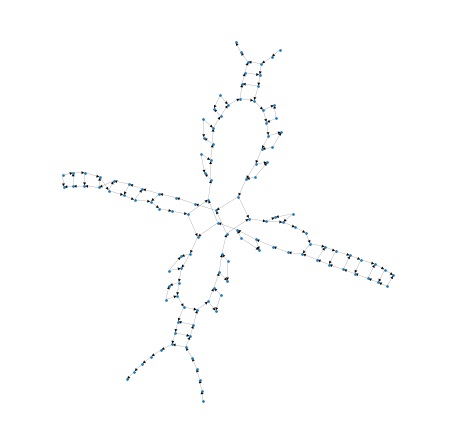

In [572]:
grf.draw(G, pos=lay1, node_size=1, width=0.1, arrowsize=5)

In [297]:
import graph_tool as gt
import graph_tool.draw
import graph_tool.generation
import graph_tool.stats

g = gt.Graph(directed=True)
g.add_edge_list(np.transpose(nx.adjacency_matrix(G).nonzero()))
# gt.stats.remove_parallel_edges(g)

pos0 = gt.draw.arf_layout(g)
# pos1 = gt.draw.fruchterman_reingold_layout(g, n_iter=1000)
pos2 = gt.draw.sfdp_layout(g)

In [329]:
arr5 = np.array([v for v in lay5.values()])
arr1 = np.array([v for v in lay1.values()])

In [330]:
vprop = g.new_vertex_property("vector<float>")
for i in range(g.num_vertices()):
    vprop[i] = arr1[i]
    
pos3 = gt.draw.sfdp_layout(g, pos=vprop, init_step=0.01, epsilon=1e-6)

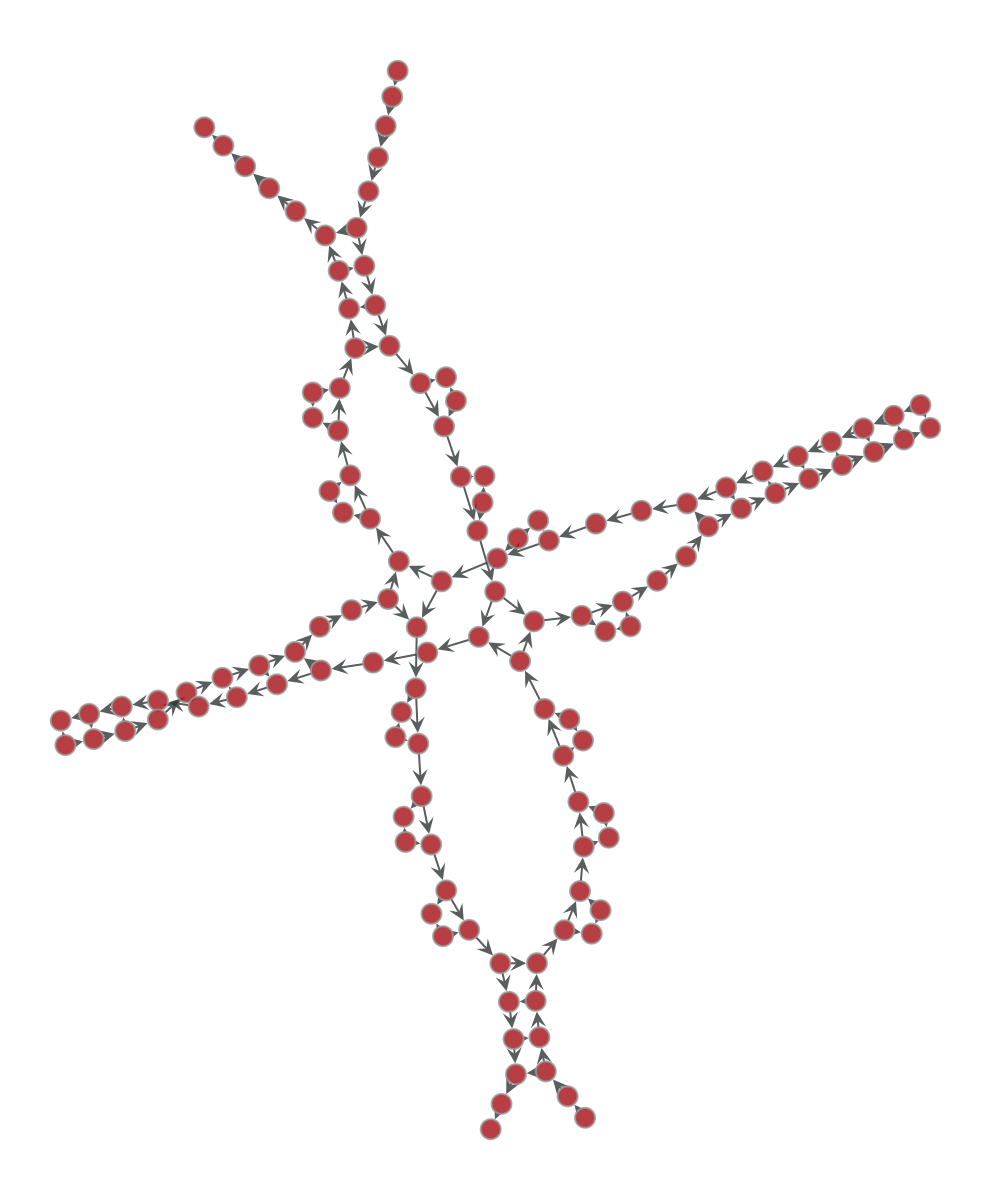

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0bab1dd100, at 0x7f0bcfc11a00>

In [331]:
gt.draw.graph_draw(g, pos=pos3, bg_color='white', vprops={'size':10})